In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12345)

In [33]:
class LogisticRegression():
  def __init__(self):
    self.thetas = []

  def loss(self, X, y, theta):
    YX = X * y[:, None]
    hy = YX @ theta
    loss = np.log(1 + np.exp(-hy)).mean()
    error = (hy <= 0).mean()
    return loss, error

  def gradient(self, X, y, theta):
    YX = X * y[:, None]
    m = X.shape[0]
    gradient = -YX.T @ (1 / (1 + np.exp(YX @ theta))) / m
    return gradient

  def gradient_descent(self, X, y, alpha, iters):
    """
    
    :param X: 
    :param y: 
    :param alpha: learning rate  
    :param iters: 
    :return: 
    """
    m, n = X.shape
    theta = np.zeros(n)
    loss, err = np.zeros(iters), np.zeros(iters)
    grad = np.zeros((iters, n))

    for t in range(1, iters):
      loss[t], err[t] = self.loss(X, y, theta)
      # print(self.gradient(X, y, theta))

      grad[t] = self.gradient(X, y, theta)
      theta -= alpha * grad[t]
      self.thetas.append(theta)
      # print("At step {}: theta={}, loss={}, err={}, grad={}".
      #       format(t, theta, loss[t], err[t], grad[t]))

    return theta, loss, err, grad

In [34]:
# LOAD DATA
df = pd.read_table('data/iris.data.txt', sep=',',
                 names=['sepal length', 'sepal width', 'petal length',
                        'petal width', 'label'])
df = df[
df['label'].isin(['Iris-setosa', 'Iris-versicolor'])]  # only keep 2 classes
df = df.reset_index(drop=True)
print('Dimensions:', df.shape)
df.head()

Dimensions: (100, 5)


,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
# post - processing
X = df.drop('label', axis=1)
X.columns = ['X1', 'X2', 'X3', 'X4']
y = df['label']
print(X.shape, y.shape)

df = pd.DataFrame(X, columns=['X1', 'X2', 'X3', 'X4'])
df['label'] = y
df.head()

(100, 4) (100,)


,X1,X2,X3,X4,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
# MODEL
  X = df[['X1', 'X2', 'X3', 'X4']].as_matrix()
  # X = np.array(X, dtype=np.float32)
  # convert to 1 / -1 labels
  y = ((df['label'] == 'Iris-setosa') * 2 - 1).as_matrix()
  y = np.array(y, dtype=np.int)

  # define a model
  n_epochs = 5000
  model = LogisticRegression()
  alpha = 0.5
  theta, losses, err, grads = model.gradient_descent(X, y, alpha, n_epochs)
  print("Converged theta = {}".format(theta))

Converged theta = [ 1.0461706   3.49515842 -5.33005124 -2.45479764]


In [37]:
# Creating a grid of theta values (centered at optimal theta)
  grid_size = 100
  theta_0_range = np.linspace(theta[0] - 10, theta[0] + 10, grid_size)
  theta_1_range = np.linspace(theta[1] - 10, theta[1] + 10, grid_size)
  theta_2_range = np.linspace(theta[2] - 10, theta[2] + 10, grid_size)
  theta_3_range = np.linspace(theta[3] - 10, theta[3] + 10, grid_size)

In [39]:
# define possible pairs
  theta_01, theta_10 = np.meshgrid(theta_0_range, theta_1_range)
  theta_02, theta_20 = np.meshgrid(theta_0_range, theta_2_range)
  theta_03, theta_30 = np.meshgrid(theta_0_range, theta_3_range)
  theta_12, theta_21 = np.meshgrid(theta_1_range, theta_2_range)
  theta_13, theta_31 = np.meshgrid(theta_1_range, theta_3_range)
  theta_23, theta_32 = np.meshgrid(theta_2_range, theta_3_range)

In [40]:
grid_rows, grid_cols = theta_01.shape

  # this loss is global loss for all dimensions
  loss = np.zeros((grid_rows, grid_cols))
  for i in range(grid_rows):
    for j in range(grid_cols):
      # loss[i, j] = losses[i]
      theta = np.array([theta_01[i, j], theta_10[i, j],
                        theta_23[i, j], theta_32[i, j]])
      loss[i, j] = model.loss(X, y, theta)[0]

In [41]:
# perform gradient
  n_step = 200
  theta_ = [np.array((0., 0., 0., 0.))]
  loss_ = [model.loss(X, y, theta_[-1])[0]]
  alpha = 1.5
  for j in range(n_step-1):
    prev_theta = theta_[-1]

    # update now based on the closed form formula
    current_grad = model.gradient(X, y, prev_theta)
    current_theta = prev_theta - alpha * current_grad

    theta_.append(current_theta)
    loss_.append(model.loss(X, y, theta_[-1])[0])

In [42]:
pairs = {
    '01': [theta_01, theta_10],
    '02': [theta_02, theta_20],
    '03': [theta_03, theta_03],
    '12': [theta_12, theta_12],
    '13': [theta_13, theta_13],
    '23': [theta_23, theta_23],
  }

In [43]:
def plot(selected_idx):
    theta = [(x[selected_idx[0]], x[selected_idx[1]]) for x in theta_]
    selected_pair = pairs[str(selected_idx[0]) + str(selected_idx[1])]

    # draw now
    colors = ['b', 'g', 'm', 'c', 'orange']
    fig = plt.figure(figsize=(12, 7))
    ax = plt.axes(projection='3d')
    # ax.plot_surface(theta_01, theta_10, loss)
    ax.plot_surface(selected_pair[0], selected_pair[1], loss)

    # draw gradient
    for j in range(1, n_step):
      a = Arrow3D([theta[j-1][0], theta[j][0]],
                  [theta[j-1][1], theta[j][1]],
                  [loss_[j-1], loss_[j]],
                  mutation_scale=20,
                  lw=1, arrowstyle="-|>", color='r')
      ax.add_artist(a)

    # more decoration
    first_theta_, second_theta_ = zip(*theta)
    ax.scatter(first_theta_, second_theta_, loss_,
               c=colors*int(n_step/len(colors)),
               s=40, lw=0,
               zorder=1)

    ax.set_title('Loss landscape')
    ax.set_xlabel('theta0')
    ax.set_ylabel('theta1')
    ax.set_zlabel('Loss')
    ax.view_init(40, 250)

    plt.draw()
    plt.show()

In [44]:
def write_surface_points(selected_idxes, pairs, losses):
    first = str(selected_idxes[0])
    second = str(selected_idxes[1])

    pair = pairs[str(selected_idx[0]) + str(selected_idx[1])]

    suffix = first + second
    with open('data/surface_' + suffix + '.csv', 'w') as f:
      f.write('theta_' + first + ',' + 'theta_' + second + ',' + 'loss' + '\n')
      for i in range(len(losses)):
        for j in range(len(losses)):
          f.write(str(pair[0][i, j]) + ',' + str(pair[1][i, j])
                  + ',' + str(losses[i, j]) + '\n')

In [45]:
def write_gradients(selected_idxes, loss_, refined_theta):
    first = str(selected_idxes[0])
    second = str(selected_idxes[1])
    suffix = first + second
    with open('data/gradients_' + suffix + '.csv', 'w') as f:
      f.write('theta_' + first + ',' + 'theta_' + second + ',' + 'loss' + '\n')
      for i in range(len(loss_)):
        f.write(str(refined_theta[i][0]) + ',' + str(refined_theta[i][1]) +
                ',' + str(loss_[i]) + '\n')

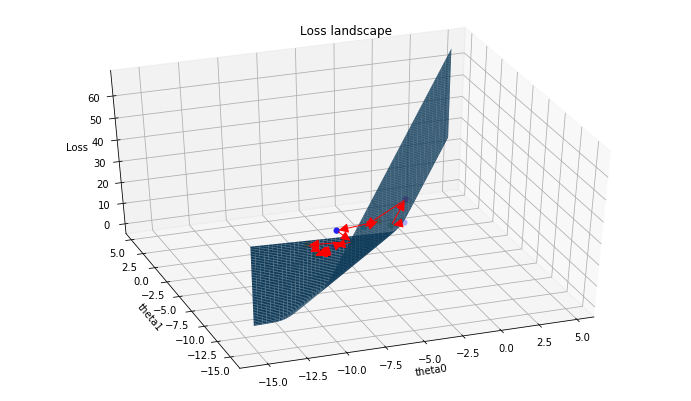

In [46]:
# narrow down theta_ to 2D for plotting on 2 DIMENSIONS only
  selected_idx = [2, 3]
  plot(selected_idx)

In [47]:
write_surface_points(selected_idx, pairs, loss)
  write_gradients(selected_idx, loss_, theta_)

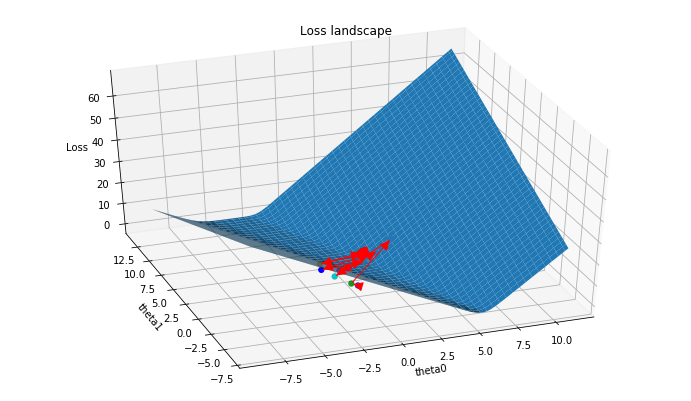

In [48]:
selected_idx = [0, 1]
  plot(selected_idx)

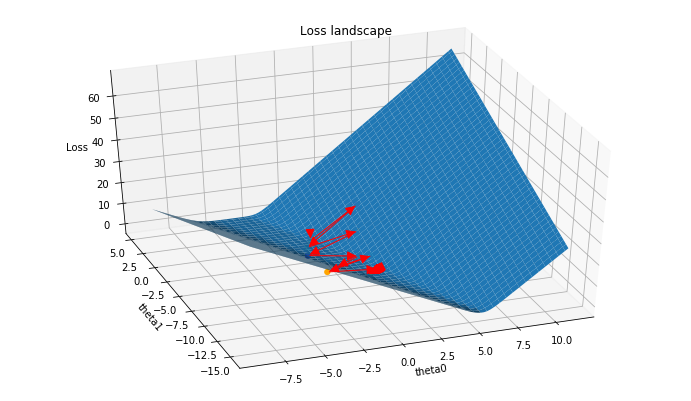

In [49]:
selected_idx = [0, 2]
  plot(selected_idx)

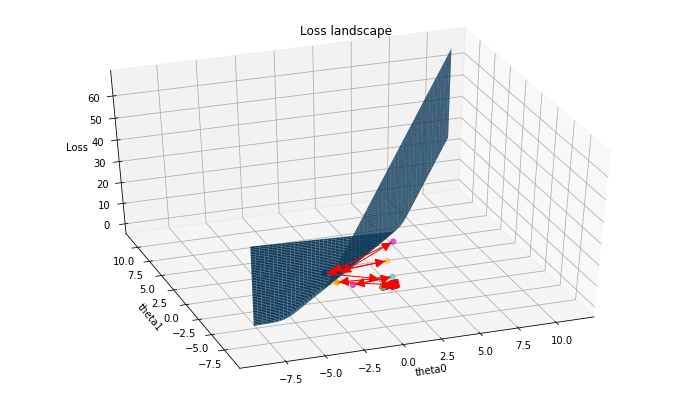

In [50]:
selected_idx = [0, 3]
  plot(selected_idx)

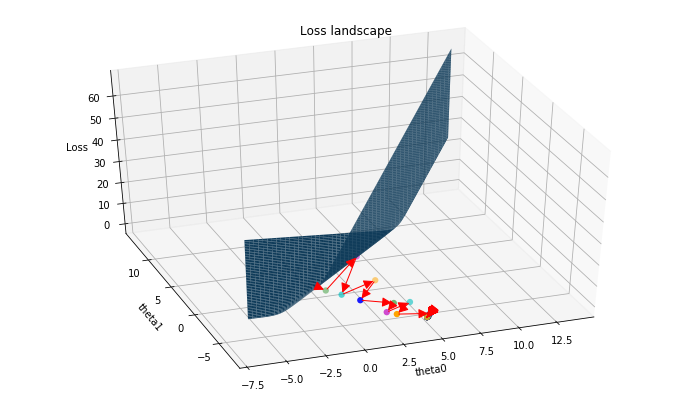

In [51]:
selected_idx = [1, 2]
  plot(selected_idx)

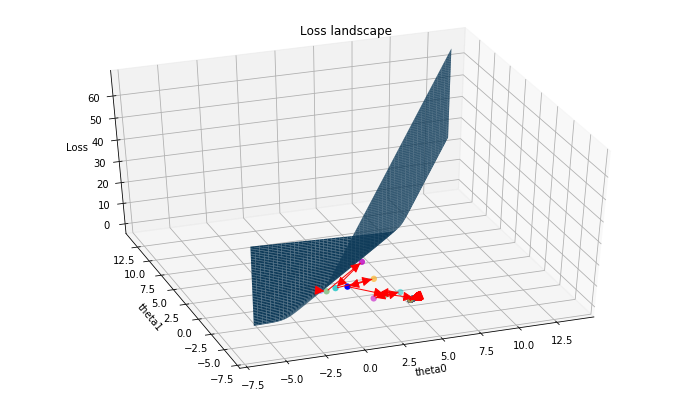

In [52]:
selected_idx = [1, 3]
  plot(selected_idx)

In [ ]:
# remember to write to files if interested
# write_surface_points(selected_idx, pairs, loss)
# write_gradients(selected_idx, loss_, theta_)